In [6]:
import tools
# from data import MotusDataset_best_of

import os
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# %matplotlib inline
from scipy.io import wavfile
import soundfile as sf

import torch
# import torch.nn as nn
# import torch.nn.functional as F

DEFAULT_OFFSET = 201
byte_scale = 2147483647
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

In [7]:
folder = '../data/Motus/best_of/sh_rirs/0166_3_sh_rirs.wav'
fs, wav = wavfile.read(folder)
cutoff_idx = 48000
x = torch.from_numpy(wav[:cutoff_idx,0].T/byte_scale)


# folder = '../data/Motus/best_of/sh_rirs/0020_1_sh_rirs.wav'
# _, wav = wavfile.read(folder)
# x = torch.stack([x, torch.from_numpy(wav[:cutoff_idx,0].T/byte_scale)])
x.shape

torch.Size([48000])

In [8]:
n_fft=1024
spec = T.Spectrogram(n_fft=n_fft, power=None, hop_length=n_fft//4)
x_spec = spec(x)
print(x_spec.shape)

ispec = T.InverseSpectrogram(n_fft=n_fft, hop_length=n_fft//4)
x_ispec = ispec(x_spec, len(x))

# plt.plot(x-x_ispec)


torch.Size([513, 188])


In [9]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(F.amplitude_to_DB(spec, 20, 2e-5, np.log10(2e-5)), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
def plot_phase_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Phase Spectrogram")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(spec, origin="lower", aspect=aspect, cmap=mpl.colormaps['twilight_shifted'])
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
    
def if_compute(arg):
    unwrapped_angle = np.unwrap(arg).astype(np.single)
    return np.concatenate([unwrapped_angle[:,0:1], np.diff(unwrapped_angle, n=1)], axis=-1)


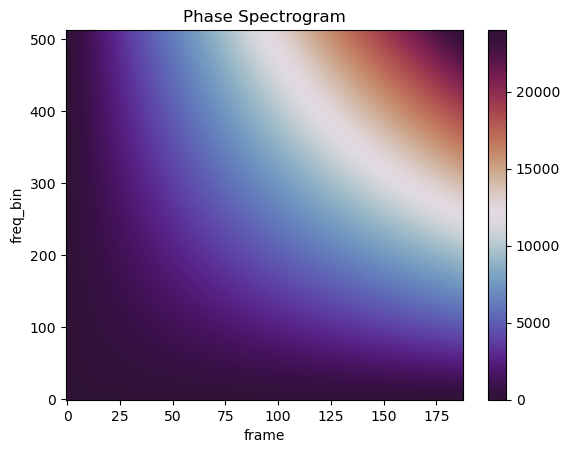

(513, 188)


In [10]:
torch.angle(torch.tensor(4))

t = torch.linspace(0, 2*np.pi*fs/len(x), x_spec.shape[-1])
f = torch.linspace(0, fs/2, 513)

phase_offset = f[:,None]*t[None,:]
plot_phase_spectrogram(phase_offset/(2*np.pi))

phase = if_compute(torch.angle(x_spec))/np.pi
print(phase.shape)
# plot_phase_spectrogram(torch.angle(x_spec-phase_offset))

In [11]:
print(phase[:,3:].shape)

(513, 185)


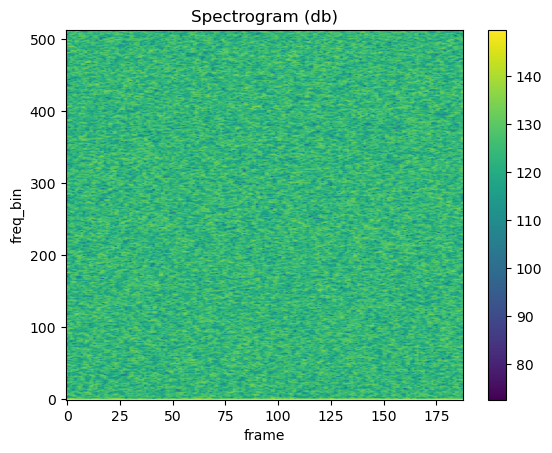

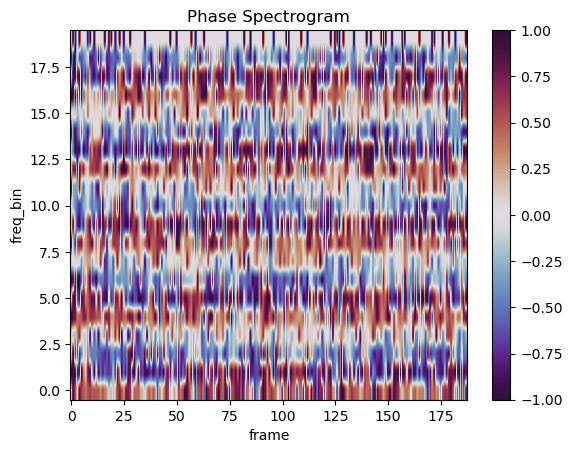

In [16]:
x = 2*torch.randn(x.shape)-1
x_spec = spec(x)

plot_spectrogram(torch.abs(x_spec))
phase = if_compute(torch.angle(x_spec))/np.pi
# phase = torch.angle(x_spec)
plot_phase_spectrogram(phase[-20:,:])

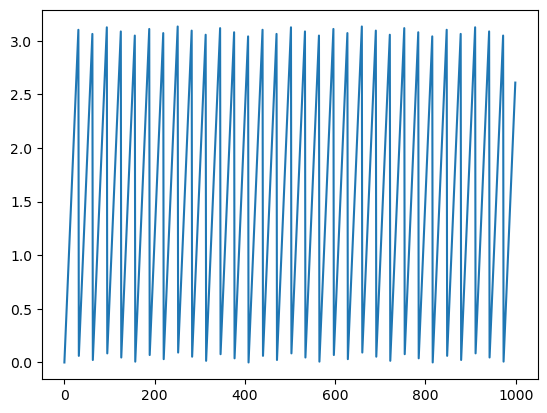

In [117]:
phase = np.linspace(0., 100., 1000) % (np.pi)
plt.plot(phase)
plt.show()

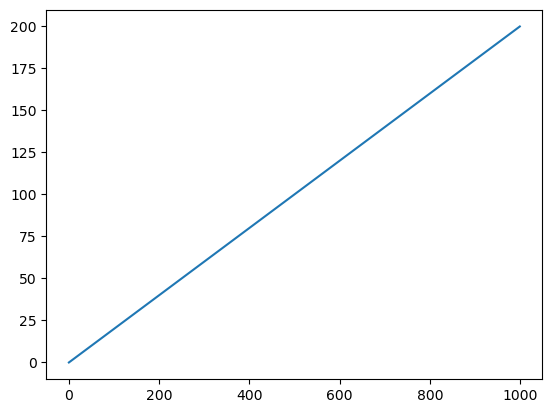

In [119]:
plt.plot(np.unwrap(2*phase))

#### Testing `MotusDataset_best_of`

In [2]:
# data_dir = tools.select_data_dir()
# trainset = MotusDataset_best_of(root=data_dir, train=True, cutoff=0.05, resample=None)
# fs = trainset.sample_rate

The data directory is ../data
../data\Motus/best_of/sh_rirs


In [3]:
sample_ir, sample_tail = trainset[np.random.choice(len(trainset))]

In [4]:
sample_tail.shape

torch.Size([1, 117600])

In [ ]:
from IPython.display import Audio, display
Audio(sample_tail, rate=fs)

In [ ]:
dataset = trainset.x
dataset.shape

(2400,)
torch.Size([1, 2400])


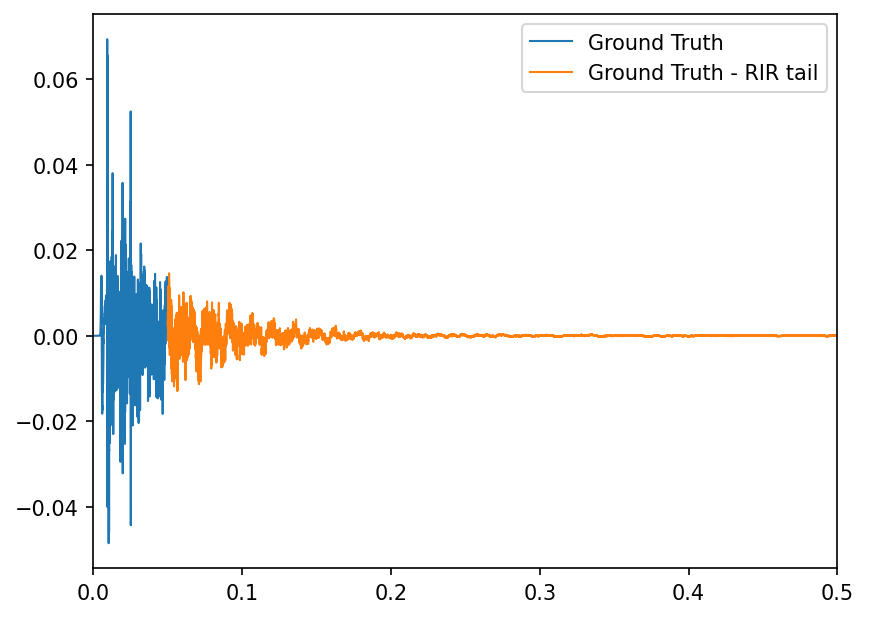

In [5]:
###### Plot a sample IR ##### 
time_scale = np.linspace(0,sample_ir.shape[-1]/fs, sample_ir.shape[-1])
time_scale2 = np.linspace(time_scale[-1],sample_tail.shape[-1]/fs+time_scale[-1],sample_tail.shape[-1])
print(time_scale.shape)
print(sample_ir.shape)
#Plot the data 
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

fig, ax = plt.subplots(1)
ax.plot(time_scale, torch.flatten(sample_ir), time_scale2, torch.flatten(sample_tail), linewidth=1)
ax.legend(['Ground Truth', 'Ground Truth - RIR tail'])
# plt.savefig('test_matplotlib.png', bbox_inches="tight")
plt.xlim([0,0.5])
plt.show()

In [12]:
######## Check energy decay curve for a good crop time
#######
pa_ref = 2e-5
dataset_energy = 10*torch.log10((dataset/pa_ref)**2)
dataset_energy.shapedataset_energy.shape

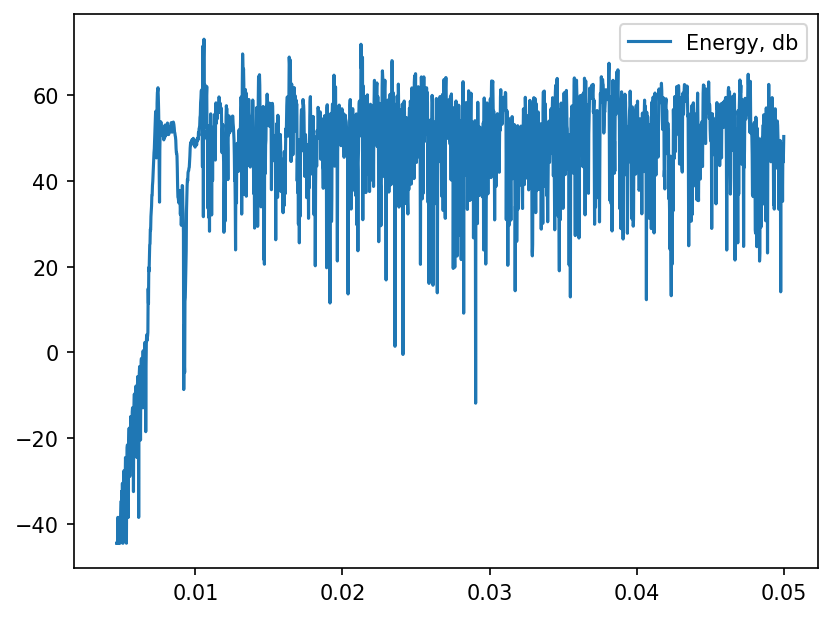

In [14]:
fig, ax = plt.subplots(1)
ax.plot(time_scale, dataset_energy[23])
ax.legend(['Energy, db' ]S)
plt.show()

In [15]:
a = np.array([0.0, 1.0, -1.0], dtype='float32')
a_as_int32 = a.view('int32')

a_as_int32

array([          0,  1065353216, -1082130432])

In [11]:
a.dtype

dtype('float32')